In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from boruta import BorutaPy


In [2]:
X = pd.read_csv("../../data/beta.by.intensity.csv",index_col=0).T
y = pd.read_csv("../../data/label.csv",index_col=0)

In [54]:
#X.T.to_csv("../../data/beta.by.intensity.csv")

In [12]:
X

,cg26928153,cg16269199,cg26679879,cg22519184,cg09499020,cg15979415,cg04747364,cg16736630,cg05898754,cg03128332,...,cg05615487,cg14596330,cg22122449,cg09606074,cg25650340,cg15272228,cg13801850,cg08423507,cg06580127,cg09226288
GSM7696105,0.949382,0.849962,0.349899,0.385615,0.465940,0.491638,0.874564,0.370954,0.259702,0.177908,...,0.597411,0.419621,0.665954,0.597030,0.572709,0.894593,0.829061,0.958514,0.819632,0.625047
GSM7696106,0.930796,0.841949,0.374453,0.388604,0.515538,0.552165,0.896216,0.364869,0.237310,0.215308,...,0.709882,0.520629,0.744882,0.691833,0.633281,0.892330,0.855849,0.950248,0.849278,0.705938
GSM7696107,0.908589,0.841174,0.374274,0.391163,0.519473,0.537705,0.877071,0.402674,0.228321,0.204195,...,0.656830,0.480127,0.745128,0.701284,0.641072,0.876281,0.866736,0.961559,0.840471,0.632181
GSM7696108,0.946409,0.857419,0.303439,0.388229,0.509172,0.562378,0.916315,0.452286,0.259254,0.179904,...,0.654703,0.492838,0.715468,0.666430,0.613012,0.884722,0.828517,0.959770,0.846135,0.653196
GSM7696109,0.918130,0.828320,0.306406,0.397604,0.342361,0.570397,0.878767,0.470658,0.214181,0.132849,...,0.690194,0.502592,0.714492,0.672155,0.623879,0.897443,0.860377,0.973419,0.839476,0.669952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM7696200,0.941952,0.853923,0.367439,0.418282,0.564748,0.485379,0.837037,0.332209,0.208424,0.204773,...,0.571137,0.431218,0.681693,0.646834,0.586019,0.871083,0.815424,0.971543,0.792813,0.596282
GSM7696201,0.945960,0.845093,0.352230,0.450986,0.598019,0.608405,0.873488,0.452678,0.263493,0.198108,...,0.753064,0.533436,0.811287,0.757406,0.680422,0.892906,0.885990,0.966518,0.835966,0.653986
GSM7696202,0.945269,0.858309,0.375522,0.402864,0.436413,0.583788,0.851894,0.397986,0.261205,0.256291,...,0.709388,0.510637,0.724303,0.710963,0.618095,0.874864,0.856630,0.975354,0.817663,0.668416
GSM7696203,0.955028,0.841660,0.293682,0.363795,0.241667,0.587539,0.878586,0.487003,0.247004,0.262522,...,0.757703,0.592155,0.811601,0.783042,0.708166,0.878300,0.860298,0.986310,0.797529,0.610820


In [6]:
y_train,y_test = train_test_split(y, test_size=0.3, random_state=42)

In [8]:
X_train = X.loc[y_train.index,:]
X_test = X.loc[y_test.index,:]

In [5]:
mutual_info = mutual_info_classif(X, y['label'])
mutual_info

array([0.0447786 , 0.        , 0.        , ..., 0.        , 0.02719599,
       0.        ])

In [6]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

cg06419771    0.264690
cg08801887    0.253830
cg21128569    0.251152
cg23248729    0.250253
cg12717729    0.247301
                ...   
cg19734188    0.000000
cg24344981    0.000000
cg11621104    0.000000
cg11854259    0.000000
cg09226288    0.000000
Length: 500257, dtype: float64

Text(0, 0.5, 'Frequency')

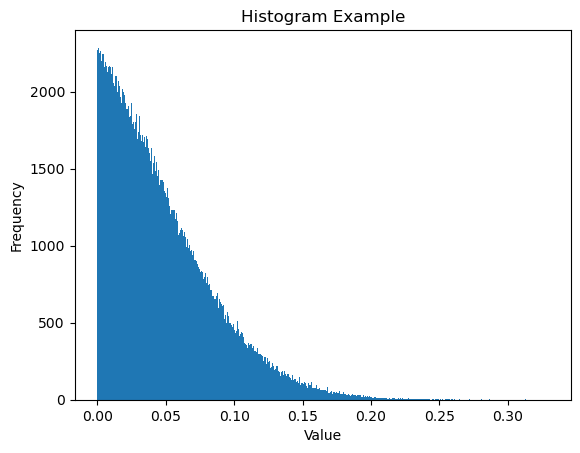

In [19]:
plt.hist(mutual_info[mutual_info != 0], bins=500)
plt.title('Histogram Example')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [7]:
mutual_info.sort_values(ascending=False, inplace=True)

In [8]:
mutual_info

cg06419771    0.264690
cg08801887    0.253830
cg21128569    0.251152
cg23248729    0.250253
cg12717729    0.247301
                ...   
cg19734188    0.000000
cg24344981    0.000000
cg11621104    0.000000
cg11854259    0.000000
cg09226288    0.000000
Length: 500257, dtype: float64

In [9]:
mi_features = list(mutual_info.index)

In [24]:
clf = RandomForestClassifier()

In [39]:
clf.fit(X_train.loc[:,mi_features[:10]], y_train['label'])

RandomForestClassifier()

In [40]:
y_prob = clf.predict_proba(X_test.loc[:,mi_features[:10]])

In [41]:
roc_auc_score(y_test['label'], y_prob[:,1])

0.3303167420814479

100%|██████████| 300/300 [12:59<00:00,  2.60s/it]


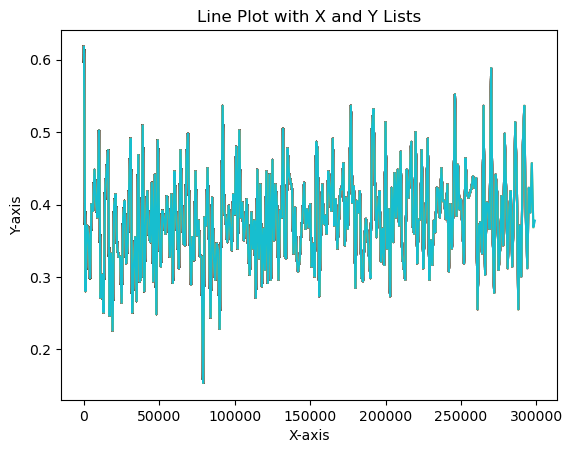

In [48]:
num = []
aucs = []
for i in tqdm(range(1,300000,1000)):
    clf = RandomForestClassifier()
    clf.fit(X_train.loc[:,mi_features[:i]], y_train['label'])
    y_prob = clf.predict_proba(X_test.loc[:,mi_features[:i]])
    auc = roc_auc_score(y_test['label'], y_prob[:,1])
    num.append(i)
    aucs.append(auc)
    plt.plot(num, aucs)
    plt.title('Line Plot with X and Y Lists')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.savefig('fs.png')

In [11]:
X.T.loc[mi_features[:20000],].to_csv("../../data/beta_test.csv")

In [10]:
mi_features[:10]

['cg06419771',
 'cg08801887',
 'cg21128569',
 'cg23248729',
 'cg12717729',
 'cg25264299',
 'cg03185624',
 'cg13166888',
 'cg20650539',
 'cg23976336']

In [13]:
my_list = [4, 2, 8, 5, 1, 7, 3, 6, 9, 10]
sorted(range(len(my_list)), key=lambda i: my_list[i], reverse=True)[:3]

[9, 8, 2]

In [16]:
num_gene = 5
num_meth = 6
all_indice = [i for i in range(num_gene+num_meth)]
kept_meth = [0,3,5]
all_indice[slice(0,num_gene)] + [all_indice[i+num_gene] for i in kept_meth]


[0, 1, 2, 3, 4, 5, 8, 10]

In [2]:
with open("./mi_feat_idx.pkl", 'rb') as file:
    feat_sel_index = pickle.load(file)

In [7]:
feat_sel_index['fold0'][-20005:-19995]

[24857, 24858, 24859, 24860, 24861, 99195, 51679, 506239, 400932, 436711]

In [8]:
feat_sel_index['fold0'][:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
with open("../../data/folds/fold_1.pkl", 'rb') as file:
    fold1 = pickle.load(file)

In [10]:
fold1

{'train': array([ 0,  1,  2,  3,  5,  6,  7,  8, 10, 11, 12, 13, 14, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 28, 29, 31, 32, 33, 35, 36, 37, 39, 40,
        41, 42, 44, 45, 48, 49, 51, 52, 53, 54, 55, 57, 58, 59, 60, 62, 63,
        64, 65, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 82, 83,
        84, 85, 86, 87, 88, 90, 92, 93, 94, 95, 97, 98]),
 'test': array([ 4,  9, 15, 27, 30, 34, 38, 43, 46, 47, 50, 56, 61, 66, 73, 81, 89,
        91, 96, 99])}

In [6]:
train_index = fold1['train']
test_index = fold1['test']
X = np.array(X)
y = np.array(y)
x_train_ = X[train_index]
y_train_ = y[train_index] 
x_test = X[test_index]  
y_test = y[test_index] 
x_train, x_val, y_train, y_val = train_test_split(x_train_, y_train_, 
                                                  test_size=1/9, random_state = 0, stratify = y_train_)

smote = SMOTE(random_state=0)
x_train, y_train = smote.fit_resample(x_train,y_train)
y_train = y_train.reshape(-1,1)

In [27]:
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

/ihome/hpark/laz64/.conda/envs/torch/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


cg21128569    0.364519
cg07109430    0.334135
cg09640960    0.326044
cg12220843    0.303296
cg25924688    0.297549
                ...   
cg16534916    0.000000
cg08802838    0.000000
cg04828277    0.000000
cg10073898    0.000000
cg01068252    0.000000
Length: 500257, dtype: float64

In [28]:
mutual_info.sort_values(ascending=False,inplace=True)

In [29]:
mutual_info


cg21128569    0.364519
cg07109430    0.334135
cg09640960    0.326044
cg12220843    0.303296
cg25924688    0.297549
                ...   
cg16534916    0.000000
cg08802838    0.000000
cg04828277    0.000000
cg10073898    0.000000
cg01068252    0.000000
Length: 500257, dtype: float64

In [32]:
X0 = pd.read_csv("../../data/gene.average.beta.by.intensity.csv",index_col=0).T

In [33]:
X0

,DDX11L1,LOC101928626,FAM87B,LINC01128,LOC643837,FAM41C,FLJ39609,SAMD11,NOC2L,KLHL17,...,CPT1B,CHKB,CHKB-CPT1B,LOC100144603,CHKB-AS1,MAPK8IP2,ARSA,SHANK3,ACR,RPL23AP82
GSM7696105,0.903607,0.369017,0.490236,0.856898,0.396936,0.523383,0.785023,0.380371,0.721502,0.584189,...,0.665920,0.613691,0.183259,0.060108,0.238494,0.477834,0.248370,0.702498,0.675193,0.753094
GSM7696106,0.889067,0.382273,0.550075,0.856898,0.396936,0.576644,0.832249,0.395329,0.726374,0.618254,...,0.778434,0.639025,0.211154,0.057908,0.235433,0.504161,0.273308,0.743725,0.737574,0.801945
GSM7696107,0.875331,0.383384,0.536354,0.856898,0.396936,0.567270,0.830621,0.400571,0.708445,0.608112,...,0.655629,0.631947,0.211162,0.057673,0.257562,0.490585,0.272053,0.728342,0.725131,0.762467
GSM7696108,0.905629,0.350382,0.558093,0.856898,0.396936,0.559835,0.814929,0.403336,0.732340,0.627227,...,0.720448,0.676515,0.233686,0.057116,0.243029,0.520785,0.297774,0.737885,0.712808,0.776571
GSM7696109,0.878537,0.357387,0.556318,0.856898,0.396936,0.565600,0.833580,0.413174,0.723161,0.621842,...,0.761254,0.663673,0.221173,0.050448,0.310029,0.520832,0.285487,0.742278,0.730969,0.779435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM7696200,0.902054,0.395319,0.492938,0.856898,0.396936,0.554602,0.792813,0.393665,0.691131,0.587880,...,0.768015,0.618245,0.202043,0.059871,0.245150,0.459463,0.257670,0.698254,0.670295,0.719106
GSM7696201,0.895547,0.408619,0.607652,0.856898,0.396936,0.586886,0.856471,0.413212,0.732579,0.629336,...,0.762230,0.651292,0.215658,0.062774,0.232147,0.518415,0.285175,0.762045,0.775137,0.772053
GSM7696202,0.907030,0.390552,0.572244,0.856898,0.396936,0.595500,0.846912,0.385738,0.701926,0.604193,...,0.705824,0.612445,0.206191,0.056552,0.214458,0.502575,0.267388,0.741903,0.736463,0.761089
GSM7696203,0.903563,0.332958,0.557338,0.856898,0.396936,0.586817,0.848164,0.434232,0.702088,0.626863,...,0.653202,0.645671,0.199349,0.051013,0.219951,0.503750,0.298652,0.747164,0.783542,0.724422


In [36]:
m = pd.concat([X0,X],axis=1)
m

,DDX11L1,LOC101928626,FAM87B,LINC01128,LOC643837,FAM41C,FLJ39609,SAMD11,NOC2L,KLHL17,...,cg05615487,cg14596330,cg22122449,cg09606074,cg25650340,cg15272228,cg13801850,cg08423507,cg06580127,cg09226288
GSM7696105,0.903607,0.369017,0.490236,0.856898,0.396936,0.523383,0.785023,0.380371,0.721502,0.584189,...,0.597411,0.419621,0.665954,0.597030,0.572709,0.894593,0.829061,0.958514,0.819632,0.625047
GSM7696106,0.889067,0.382273,0.550075,0.856898,0.396936,0.576644,0.832249,0.395329,0.726374,0.618254,...,0.709882,0.520629,0.744882,0.691833,0.633281,0.892330,0.855849,0.950248,0.849278,0.705938
GSM7696107,0.875331,0.383384,0.536354,0.856898,0.396936,0.567270,0.830621,0.400571,0.708445,0.608112,...,0.656830,0.480127,0.745128,0.701284,0.641072,0.876281,0.866736,0.961559,0.840471,0.632181
GSM7696108,0.905629,0.350382,0.558093,0.856898,0.396936,0.559835,0.814929,0.403336,0.732340,0.627227,...,0.654703,0.492838,0.715468,0.666430,0.613012,0.884722,0.828517,0.959770,0.846135,0.653196
GSM7696109,0.878537,0.357387,0.556318,0.856898,0.396936,0.565600,0.833580,0.413174,0.723161,0.621842,...,0.690194,0.502592,0.714492,0.672155,0.623879,0.897443,0.860377,0.973419,0.839476,0.669952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM7696200,0.902054,0.395319,0.492938,0.856898,0.396936,0.554602,0.792813,0.393665,0.691131,0.587880,...,0.571137,0.431218,0.681693,0.646834,0.586019,0.871083,0.815424,0.971543,0.792813,0.596282
GSM7696201,0.895547,0.408619,0.607652,0.856898,0.396936,0.586886,0.856471,0.413212,0.732579,0.629336,...,0.753064,0.533436,0.811287,0.757406,0.680422,0.892906,0.885990,0.966518,0.835966,0.653986
GSM7696202,0.907030,0.390552,0.572244,0.856898,0.396936,0.595500,0.846912,0.385738,0.701926,0.604193,...,0.709388,0.510637,0.724303,0.710963,0.618095,0.874864,0.856630,0.975354,0.817663,0.668416
GSM7696203,0.903563,0.332958,0.557338,0.856898,0.396936,0.586817,0.848164,0.434232,0.702088,0.626863,...,0.757703,0.592155,0.811601,0.783042,0.708166,0.878300,0.860298,0.986310,0.797529,0.610820


In [45]:
sel_feat = list(mutual_info.index[:20000])

Text(0, 0.5, 'PC2')

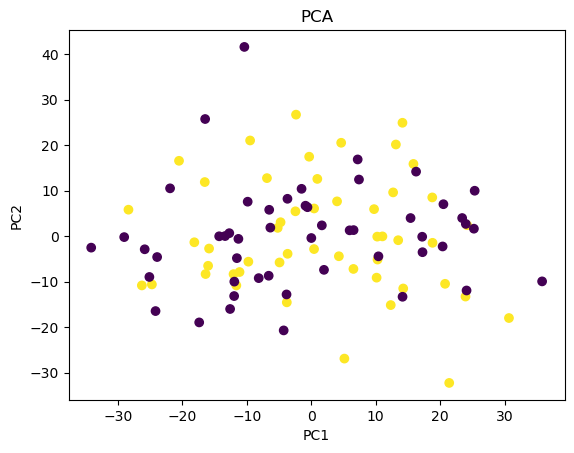

In [54]:
pca = PCA(n_components=2)
#principalComponents = pca.fit_transform(X.loc[:,sel_feat])
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
principalDf.index = y.index
principalDf["label"] = y.label
plt.scatter(principalDf['pc1'], principalDf['pc2'], c=principalDf['label'])
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [55]:
X

,cg26928153,cg16269199,cg26679879,cg22519184,cg09499020,cg15979415,cg04747364,cg16736630,cg05898754,cg03128332,...,cg05615487,cg14596330,cg22122449,cg09606074,cg25650340,cg15272228,cg13801850,cg08423507,cg06580127,cg09226288
GSM7696105,0.949382,0.849962,0.349899,0.385615,0.465940,0.491638,0.874564,0.370954,0.259702,0.177908,...,0.597411,0.419621,0.665954,0.597030,0.572709,0.894593,0.829061,0.958514,0.819632,0.625047
GSM7696106,0.930796,0.841949,0.374453,0.388604,0.515538,0.552165,0.896216,0.364869,0.237310,0.215308,...,0.709882,0.520629,0.744882,0.691833,0.633281,0.892330,0.855849,0.950248,0.849278,0.705938
GSM7696107,0.908589,0.841174,0.374274,0.391163,0.519473,0.537705,0.877071,0.402674,0.228321,0.204195,...,0.656830,0.480127,0.745128,0.701284,0.641072,0.876281,0.866736,0.961559,0.840471,0.632181
GSM7696108,0.946409,0.857419,0.303439,0.388229,0.509172,0.562378,0.916315,0.452286,0.259254,0.179904,...,0.654703,0.492838,0.715468,0.666430,0.613012,0.884722,0.828517,0.959770,0.846135,0.653196
GSM7696109,0.918130,0.828320,0.306406,0.397604,0.342361,0.570397,0.878767,0.470658,0.214181,0.132849,...,0.690194,0.502592,0.714492,0.672155,0.623879,0.897443,0.860377,0.973419,0.839476,0.669952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM7696200,0.941952,0.853923,0.367439,0.418282,0.564748,0.485379,0.837037,0.332209,0.208424,0.204773,...,0.571137,0.431218,0.681693,0.646834,0.586019,0.871083,0.815424,0.971543,0.792813,0.596282
GSM7696201,0.945960,0.845093,0.352230,0.450986,0.598019,0.608405,0.873488,0.452678,0.263493,0.198108,...,0.753064,0.533436,0.811287,0.757406,0.680422,0.892906,0.885990,0.966518,0.835966,0.653986
GSM7696202,0.945269,0.858309,0.375522,0.402864,0.436413,0.583788,0.851894,0.397986,0.261205,0.256291,...,0.709388,0.510637,0.724303,0.710963,0.618095,0.874864,0.856630,0.975354,0.817663,0.668416
GSM7696203,0.955028,0.841660,0.293682,0.363795,0.241667,0.587539,0.878586,0.487003,0.247004,0.262522,...,0.757703,0.592155,0.811601,0.783042,0.708166,0.878300,0.860298,0.986310,0.797529,0.610820


In [7]:
model = RandomForestClassifier(random_state=42)
feat_selector = BorutaPy(
    verbose=2,
    estimator=model,
    n_estimators='auto',
    max_iter=10  # number of iterations to perform
)
feat_selector.fit(x_train, y_train)

/ihome/hpark/laz64/.conda/envs/torch/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/ihome/hpark/laz64/.conda/envs/torch/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	500257
Rejected: 	0


/ihome/hpark/laz64/.conda/envs/torch/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	500257
Rejected: 	0


/ihome/hpark/laz64/.conda/envs/torch/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	500257
Rejected: 	0


/ihome/hpark/laz64/.conda/envs/torch/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	500257
Rejected: 	0


/ihome/hpark/laz64/.conda/envs/torch/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	500257
Rejected: 	0


/ihome/hpark/laz64/.conda/envs/torch/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	500257
Rejected: 	0


/ihome/hpark/laz64/.conda/envs/torch/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	500257
Rejected: 	0


/ihome/hpark/laz64/.conda/envs/torch/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	8 / 10
Confirmed: 	0
Tentative: 	1
Rejected: 	500256
Iteration: 	9 / 10
Confirmed: 	0
Tentative: 	1
Rejected: 	500256


/ihome/hpark/laz64/.conda/envs/torch/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)
/ihome/hpark/laz64/.conda/envs/torch/lib/python3.8/site-packages/boruta/boruta_py.py:319: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  self.support_ = np.zeros(n_feat, dtype=np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [4]:
X

,cg26928153,cg16269199,cg26679879,cg22519184,cg09499020,cg15979415,cg04747364,cg16736630,cg05898754,cg03128332,...,cg05615487,cg14596330,cg22122449,cg09606074,cg25650340,cg15272228,cg13801850,cg08423507,cg06580127,cg09226288
GSM7696105,0.949382,0.849962,0.349899,0.385615,0.465940,0.491638,0.874564,0.370954,0.259702,0.177908,...,0.597411,0.419621,0.665954,0.597030,0.572709,0.894593,0.829061,0.958514,0.819632,0.625047
GSM7696106,0.930796,0.841949,0.374453,0.388604,0.515538,0.552165,0.896216,0.364869,0.237310,0.215308,...,0.709882,0.520629,0.744882,0.691833,0.633281,0.892330,0.855849,0.950248,0.849278,0.705938
GSM7696107,0.908589,0.841174,0.374274,0.391163,0.519473,0.537705,0.877071,0.402674,0.228321,0.204195,...,0.656830,0.480127,0.745128,0.701284,0.641072,0.876281,0.866736,0.961559,0.840471,0.632181
GSM7696108,0.946409,0.857419,0.303439,0.388229,0.509172,0.562378,0.916315,0.452286,0.259254,0.179904,...,0.654703,0.492838,0.715468,0.666430,0.613012,0.884722,0.828517,0.959770,0.846135,0.653196
GSM7696109,0.918130,0.828320,0.306406,0.397604,0.342361,0.570397,0.878767,0.470658,0.214181,0.132849,...,0.690194,0.502592,0.714492,0.672155,0.623879,0.897443,0.860377,0.973419,0.839476,0.669952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM7696200,0.941952,0.853923,0.367439,0.418282,0.564748,0.485379,0.837037,0.332209,0.208424,0.204773,...,0.571137,0.431218,0.681693,0.646834,0.586019,0.871083,0.815424,0.971543,0.792813,0.596282
GSM7696201,0.945960,0.845093,0.352230,0.450986,0.598019,0.608405,0.873488,0.452678,0.263493,0.198108,...,0.753064,0.533436,0.811287,0.757406,0.680422,0.892906,0.885990,0.966518,0.835966,0.653986
GSM7696202,0.945269,0.858309,0.375522,0.402864,0.436413,0.583788,0.851894,0.397986,0.261205,0.256291,...,0.709388,0.510637,0.724303,0.710963,0.618095,0.874864,0.856630,0.975354,0.817663,0.668416
GSM7696203,0.955028,0.841660,0.293682,0.363795,0.241667,0.587539,0.878586,0.487003,0.247004,0.262522,...,0.757703,0.592155,0.811601,0.783042,0.708166,0.878300,0.860298,0.986310,0.797529,0.610820


In [2]:
with open("mi_feat_idx_kegg.pkl", 'rb') as file:
    sel_feat_idx = pickle.load(file)

In [5]:
sel_feat_idx.keys()

dict_keys(['fold0', 'fold1', 'fold2', 'fold3', 'fold4'])

In [ ]:
all_cpgs = list(pd.read_csv("../../data/beta.by.intensity.all.regions.csv").iloc[:,0])
all_path_cpgs = list(pd.read_csv("../../data/pathway_gobp_new.csv").iloc[:,0])

In [ ]:
all_path_cpg = []
for i in all_path_cpgs:
    all_path_cpg.append(i.split(":")[0])

In [16]:
len(all_path_cpg)

481378

In [ ]:
with open("mi_feat_idx_gobp.pkl", 'wb') as file:
    pickle.dump(dic, file)

In [25]:
dic

{}

In [ ]:
dic = {}
num_cpgs = len(all_cpgs)
for fold in range(0,5):
    sel_feats_idx = sel_feat_idx[f"fold{fold}"][2]
    sel_cpgs = [all_cpgs[i] for i in sel_feats_idx]
    path_cpgs = list(set(all_path_cpg).intersection(set(sel_cpgs)))
    sel_path_cpg_idx1 = [all_cpgs.index(value) for value in tqdm(path_cpgs)]
    sel_path_cpg_idx2 = [all_path_cpg.index(value) for value in tqdm(path_cpgs)]
    all_sel_idx = sel_path_cpg_idx1 + [x + num_cpgs for x in sel_feats_idx]
    dic.update({f'fold{fold}': [all_sel_idx, sel_path_cpg_idx2, sel_feats_idx]})

In [21]:
dic

{}